TODO: 
- move these files temporarily, delete folder, re-clone, make branch, add files back and commit
- ts_lib --> OO
- explore --> returns all plots
- ml stuff (static?) - correlation analysis (heatmap, scatterplots), pca and scree, histograms
- better time series data

In [1]:
import urllib.request
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

In [2]:
from ts_lib import plot_ts
from ts_lib import append_datetime_cols
from ts_lib import seasonal_catplot
from ts_lib import seasonal_decompositions
from ts_lib import periodic_kde
from ts_lib import create_windowed_df

In [3]:
# Convert the XML of the last 90 days of exchange rates from the ECB website to a pandas DataFrame

last_90 = "https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml?9531d63dc137832dc128c3fcc9bc4f12"

with urllib.request.urlopen(last_90) as response:
   xml_data = response.read()

root = ET.fromstring(xml_data)

parent = root.find('{http://www.ecb.int/vocabulary/2002-08-01/eurofxref}Cube')

df = pd.DataFrame(columns=['USD', 'JPY', 'BGN', 'CZK', 'DKK', 'GBP', 'CHF'],
                  dtype=np.dtype('float64'))
df.index = df.index.astype(np.dtype('datetime64[ns]'))

cube = root.find('{http://www.ecb.int/vocabulary/2002-08-01/eurofxref}Cube')

currencies_lst = ['USD', 'JPY', 'BGN', 'CZK', 'DKK', 'GBP', 'CHF']
dates = []
currencies_dict = {}

for child in cube:
    dates.append(child.attrib['time'])
    for rate_tag in child:
        currency = list(rate_tag.attrib.values())[0]
        rate = list(rate_tag.attrib.values())[1]
        if currency in currencies_lst:
            if currency in currencies_dict:
                currencies_dict[currency].append(rate)
            else:
                currencies_dict[currency] = [rate]

df = pd.DataFrame.from_dict(currencies_dict, dtype=np.dtype('float64'))
df['date'] = dates
df = df.set_index('date').rename_axis(None)
df.index = df.index.astype(np.dtype('datetime64[ns]'))

df.head()

,USD,JPY,BGN,CZK,DKK,GBP,CHF
2024-04-04,1.0852,164.69,1.9558,25.322,7.4589,0.85788,0.9846
2024-04-03,1.0783,163.66,1.9558,25.352,7.4589,0.85713,0.9792
2024-04-02,1.0749,163.01,1.9558,25.361,7.4582,0.85510,0.9765
2024-03-28,1.0811,163.45,1.9558,25.305,7.4580,0.85510,0.9766
2024-03-27,1.0816,163.52,1.9558,25.319,7.4582,0.85768,0.9811


In [4]:
# This assumes you have a DataFrame named df
#df.to_csv('df_export.csv', index=False)


In [5]:
USD = df[['USD']]

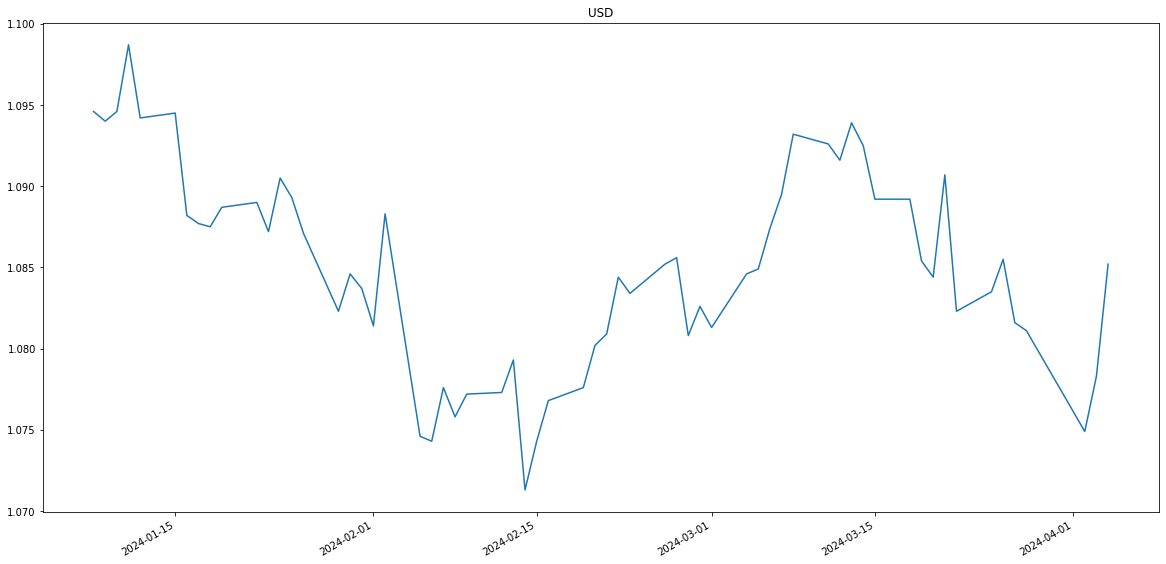

In [6]:
plot_ts(USD, 'USD')

In [7]:
dates_df = append_datetime_cols(USD, index=True)
dates_df.head()

,date,USD,year,month,day,week_of_year,week_of_month,day_of_week
0,2024-04-04,1.0852,2024,4,4,14,1,4
1,2024-04-03,1.0783,2024,4,3,14,1,3
2,2024-04-02,1.0749,2024,4,2,14,1,2
3,2024-03-28,1.0811,2024,3,28,13,4,4
4,2024-03-27,1.0816,2024,3,27,13,4,3


c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a

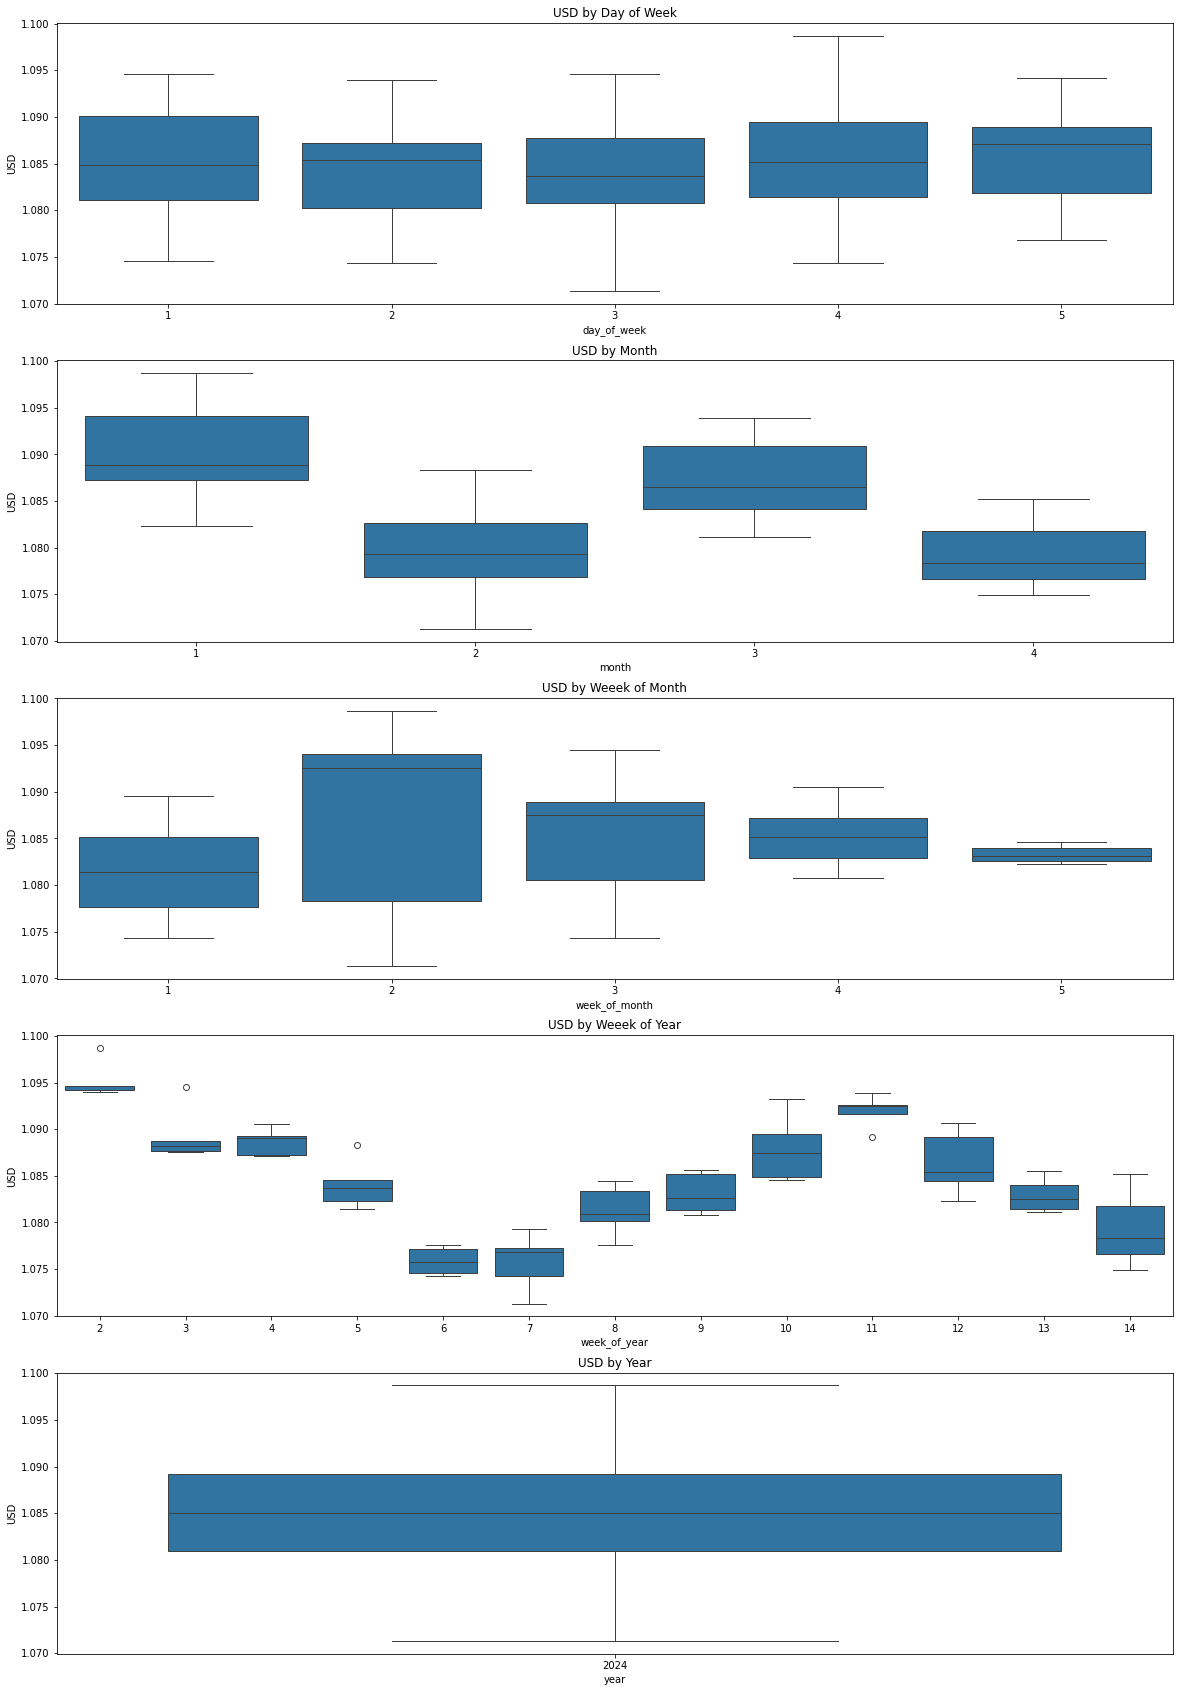

In [8]:
seasonal_catplot(USD, 'USD', kind='boxplot', index=True)

c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Mayukh Sen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset =

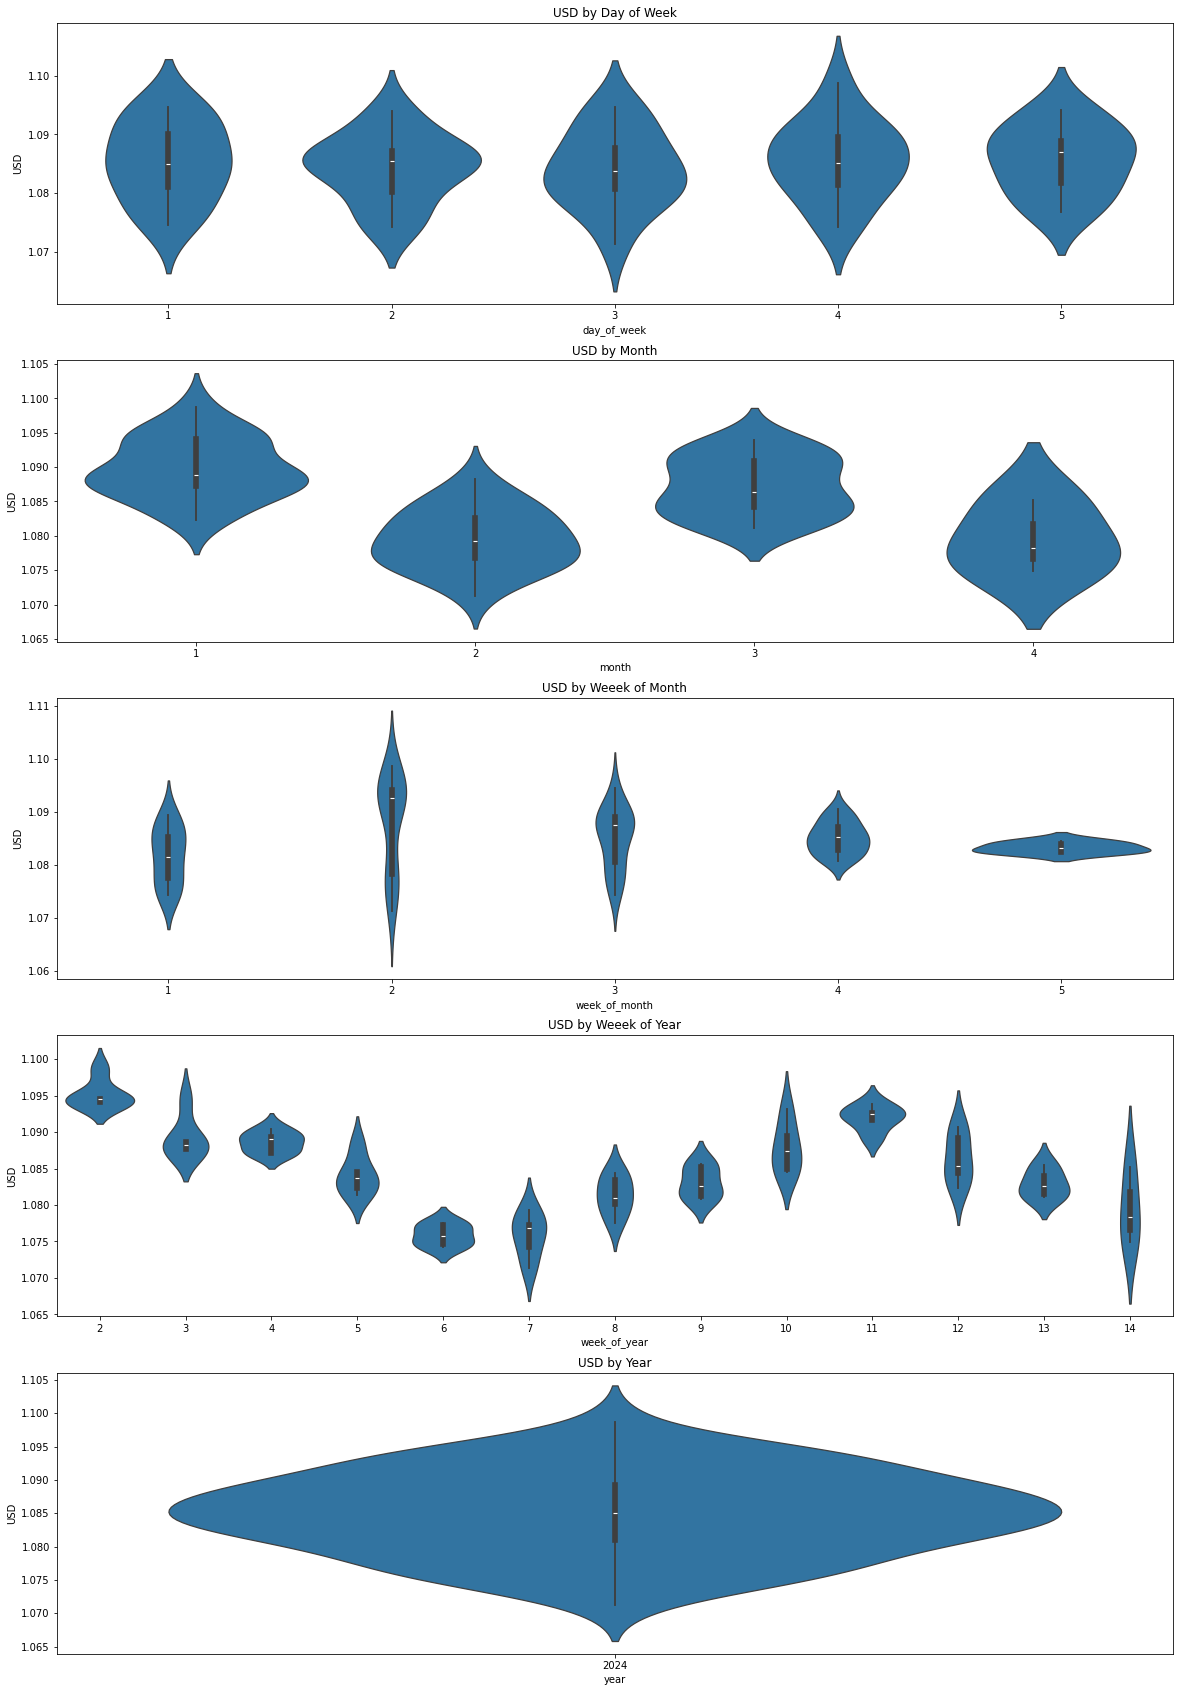

In [9]:
seasonal_catplot(USD, 'USD', kind='violinplot', index=True)

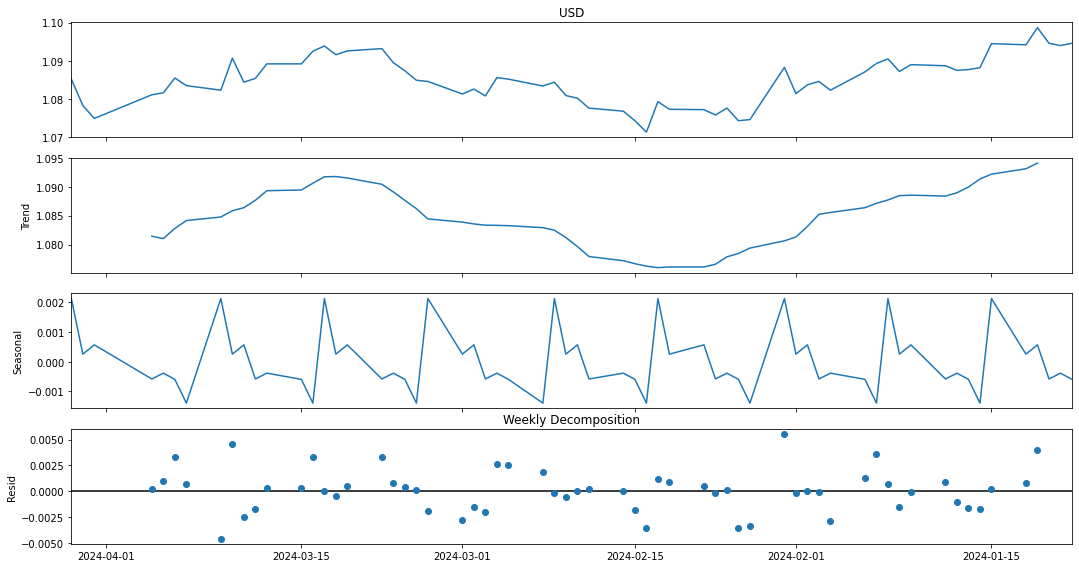

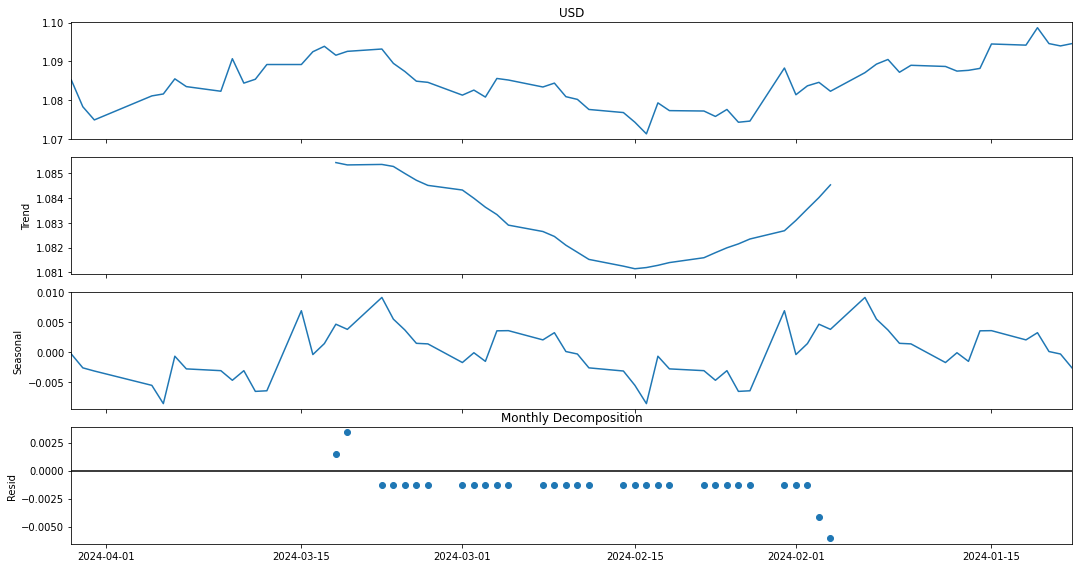

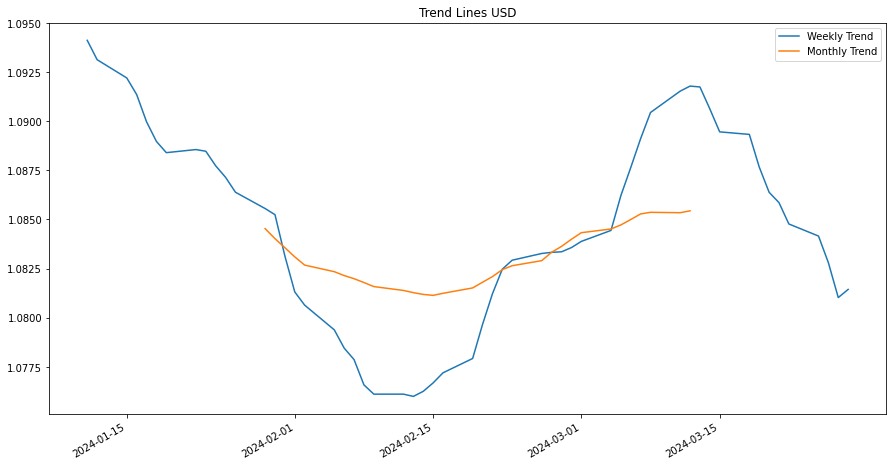

In [10]:
seasonal_decompositions(USD,'USD')

d:\Rutgers MSDS\Data Wrangling\autoeda_test\ts_lib.py:195: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  g = df.groupby(pd.Grouper(key=dt_col, freq=freq))


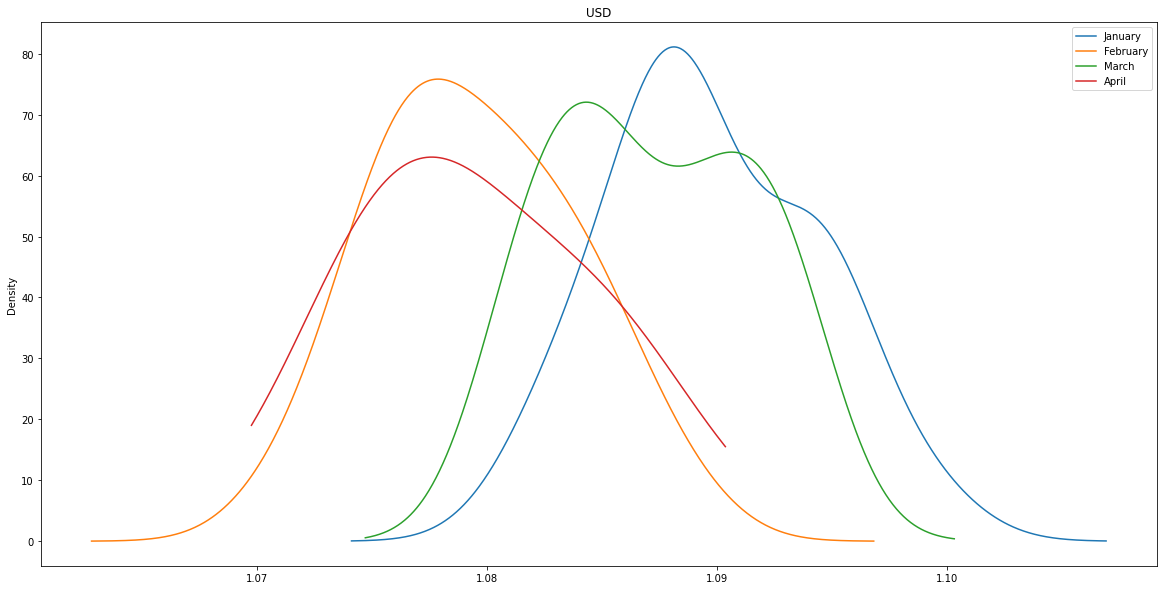

In [11]:
periodic_kde(USD, 'USD', freq='M', index=True)

In [12]:
# def make_fourier():


In [13]:
# see https://www.youtube.com/watch?v=S_Z8RnTE5dI ~52:00 minute mark

eleven_window = create_windowed_df(USD, 10, 'USD')
display(eleven_window.head(11))

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = eleven_window.drop('USD_t11', axis=1)  
y = eleven_window['USD_t11']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

,USD_t1,USD_t2,USD_t3,USD_t4,USD_t5,USD_t6,USD_t7,USD_t8,USD_t9,USD_t10,USD_t11
2024-01-08,1.0946,1.0940,1.0946,1.0987,1.0942,1.0945,1.0882,1.0877,1.0875,1.0887,1.0890
2024-01-09,1.0940,1.0946,1.0987,1.0942,1.0945,1.0882,1.0877,1.0875,1.0887,1.0890,1.0872
2024-01-10,1.0946,1.0987,1.0942,1.0945,1.0882,1.0877,1.0875,1.0887,1.0890,1.0872,1.0905
2024-01-11,1.0987,1.0942,1.0945,1.0882,1.0877,1.0875,1.0887,1.0890,1.0872,1.0905,1.0893
2024-01-12,1.0942,1.0945,1.0882,1.0877,1.0875,1.0887,1.0890,1.0872,1.0905,1.0893,1.0871
2024-01-15,1.0945,1.0882,1.0877,1.0875,1.0887,1.0890,1.0872,1.0905,1.0893,1.0871,1.0823
2024-01-16,1.0882,1.0877,1.0875,1.0887,1.0890,1.0872,1.0905,1.0893,1.0871,1.0823,1.0846
2024-01-17,1.0877,1.0875,1.0887,1.0890,1.0872,1.0905,1.0893,1.0871,1.0823,1.0846,1.0837
2024-01-18,1.0875,1.0887,1.0890,1.0872,1.0905,1.0893,1.0871,1.0823,1.0846,1.0837,1.0814
2024-01-19,1.0887,1.0890,1.0872,1.0905,1.0893,1.0871,1.0823,1.0846,1.0837,1.0814,1.0883


Mean Squared Error: 2.0678955000002172e-05
